In [2]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
# Visualization
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

# Machine Learning
from sklearn import model_selection
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score, 
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay
)
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    StackingClassifier
)
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Data Balancing
from imblearn.over_sampling import SMOTE

# Utilities
import warnings, joblib, os, traceback, io

# Suppress warnings
warnings.filterwarnings('ignore')

Loading Dataset

In [3]:
df = pd.read_csv('Dataset.csv')
df.head(15)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [4]:
# Convert the 'TotalCharges' column to numeric values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
main = df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Primary Check

In [5]:
df.shape

(7043, 21)

In [6]:
# Display a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
#counts how many duplicate rows are in the DataFrame.
df.duplicated().sum()

np.int64(0)

In [8]:
d1 = df

Creating Average charges based on tenure, monthly charges and total charges

In [9]:
# Insert a new column 'AvgCharges' representing the average monthly charge per customer (TotalCharges divided by tenure)
df.insert(loc = 20, column = 'AvgCharges', value =  df['TotalCharges'] / df['tenure'])
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,AvgCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,29.850000,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,55.573529,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,54.075000,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,40.905556,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,75.825000,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,82.937500,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,102.262500,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,31.495455,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,76.650000,Yes


In [10]:
# Count the number of missing (NaN) values in each column of the DataFrame
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
AvgCharges          11
Churn                0
dtype: int64

In [11]:
df[df['AvgCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,AvgCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,NaN,No


In [12]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,AvgCharges
count,7043.000000,7043.000000,7043.000000,7032.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441,64.799424
std,0.368612,24.559481,30.090047,2266.771362,30.185891
min,0.000000,0.000000,18.250000,18.800000,13.775000
25%,0.000000,9.000000,35.500000,401.450000,36.179891
50%,0.000000,29.000000,70.350000,1397.475000,70.373239
75%,0.000000,55.000000,89.850000,3794.737500,90.179560
max,1.000000,72.000000,118.750000,8684.800000,121.400000


In [13]:
df["AvgCharges"] = df["AvgCharges"].fillna(df["MonthlyCharges"])
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].mean())
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
AvgCharges          0
Churn               0
dtype: int64

In [14]:
# Create correlation matrix with dummy variables
corr_df = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'AvgCharges',
       'Churn']]).corr()

# Get correlations with Churn_Yes and sort them
churn_correlations = corr_df['Churn_Yes'].sort_values()

# Remove Churn_No and Churn_Yes from the results
churn_correlations = churn_correlations[~churn_correlations.index.isin(['Churn_Yes', 'Churn_No'])]

# Display the sorted correlations
print("Correlations with Churn_Yes (sorted from most negative to most positive):")
print("-" * 80)
print(churn_correlations)
print("\nNote: Positive values indicate features associated with higher churn probability")
print("      Negative values indicate features associated with lower churn probability")

Correlations with Churn_Yes (sorted from most negative to most positive):
--------------------------------------------------------------------------------
tenure                                    -0.352229
Contract_Two year                         -0.302253
OnlineBackup_No internet service          -0.227890
DeviceProtection_No internet service      -0.227890
InternetService_No                        -0.227890
OnlineSecurity_No internet service        -0.227890
TechSupport_No internet service           -0.227890
StreamingTV_No internet service           -0.227890
StreamingMovies_No internet service       -0.227890
TotalCharges                              -0.199428
PaperlessBilling_No                       -0.191825
Contract_One year                         -0.177820
OnlineSecurity_Yes                        -0.171226
TechSupport_Yes                           -0.164674
Dependents_Yes                            -0.164221
Partner_Yes                               -0.150448
PaymentMethod

In [15]:
df = df.drop(['tenure', 'MonthlyCharges', 'TotalCharges'], axis = 1)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,AvgCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,55.573529,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,54.075000,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),40.905556,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.825000,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,82.937500,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),102.262500,No
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,31.495455,No
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,76.650000,Yes


In [16]:
df_visual = main

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

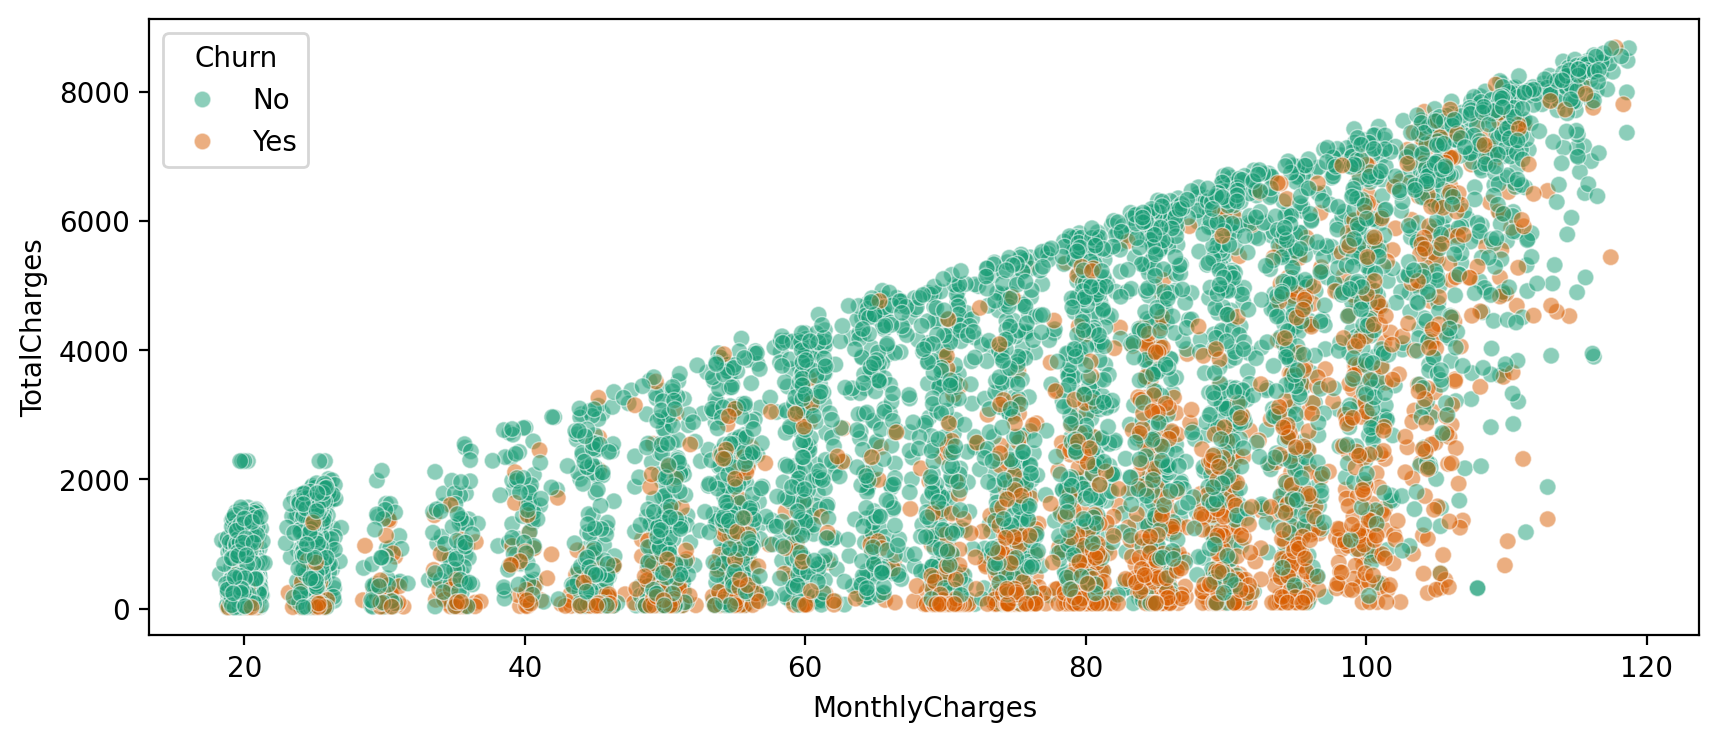

In [17]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=df_visual,x='MonthlyCharges',y='TotalCharges',hue='Churn', linewidth=0.5,alpha=0.5,palette='Dark2')

<Axes: xlabel='Churn', ylabel='count'>

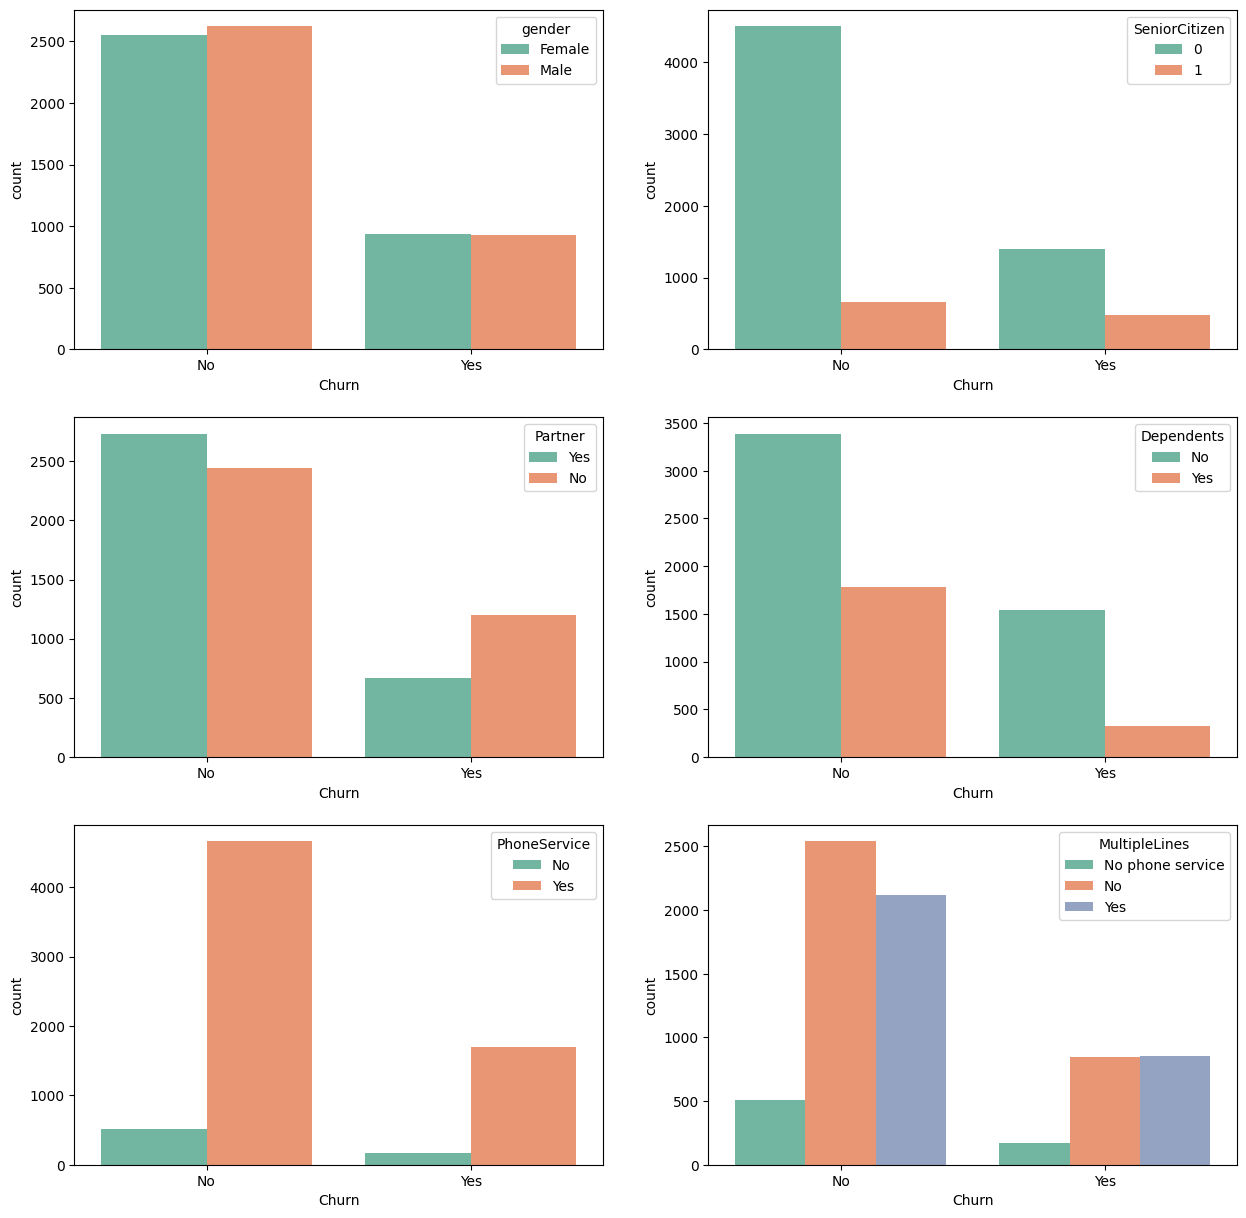

In [18]:
plt.figure(figsize = (15,15))

plt.subplot(3,2,1)
sns.countplot(x = 'Churn', hue = 'gender', palette = 'Set2', data = df_visual)

plt.subplot(3,2,2)
sns.countplot(x = 'Churn', hue = 'SeniorCitizen', palette = 'Set2', data = df_visual)

plt.subplot(3,2,3)
sns.countplot(x = 'Churn', hue = 'Partner', palette = 'Set2', data = df_visual)

plt.subplot(3,2,4)
sns.countplot(x = 'Churn', hue = 'Dependents', palette = 'Set2', data = df_visual)

plt.subplot(3,2,5)
sns.countplot(x = 'Churn', hue = 'PhoneService', palette = 'Set2', data = df_visual)

plt.subplot(3,2,6)
sns.countplot(x = 'Churn', hue = 'MultipleLines', palette = 'Set2', data = df_visual)

<Axes: xlabel='Churn', ylabel='count'>

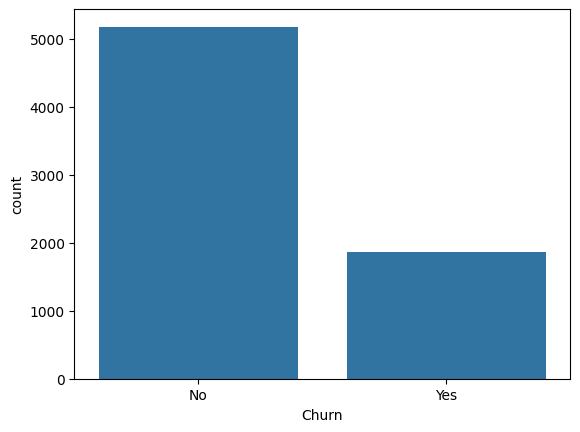

In [19]:
sns.countplot(data=df,x='Churn')

In [20]:
final = df.drop(['customerID', 'gender'], axis=1)
final.head()

,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,AvgCharges,Churn
0,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,No
1,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,55.573529,No
2,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,54.075000,Yes
3,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),40.905556,No
4,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.825000,Yes


In [21]:
# Display unique values for each column
for col in final:
    unique_vals = df[col].unique()
    print(f"{col}:", unique_vals)

SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
AvgCharges: [ 29.85        55.57352941  54.075      ...  31.49545455  76.65
 103.70454545]
Churn: ['No' 'Yes']


In [22]:
cols = final.columns.to_list()

label_encoder = LabelEncoder()
test = final['Churn']
final = final.drop(['Churn'], axis = 1)

for i in range(len(cols)-2):
    final[cols[i]] = label_encoder.fit_transform(final[cols[i]])

final['Churn'] = label_encoder.fit_transform(test)

final

,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,AvgCharges,Churn
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,29.850000,0
1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,55.573529,0
2,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,54.075000,1
3,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,40.905556,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,75.825000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,1,2,0,2,0,2,2,2,2,1,1,3,82.937500,0
7039,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1,102.262500,0
7040,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2,31.495455,0
7041,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3,76.650000,1


In [32]:
final.to_csv("processed_final.csv", index=False)

In [23]:
# Display unique values for each column in a clean format
for col in final.columns:
    unique_values = final[col].unique()
    formatted_values = np.array2string(unique_values, separator=', ')
    print(f"{col}: {formatted_values}")

SeniorCitizen: [0, 1]
Partner: [1, 0]
Dependents: [0, 1]
PhoneService: [0, 1]
MultipleLines: [1, 0, 2]
InternetService: [0, 1, 2]
OnlineSecurity: [0, 2, 1]
OnlineBackup: [2, 0, 1]
DeviceProtection: [0, 2, 1]
TechSupport: [0, 2, 1]
StreamingTV: [0, 2, 1]
StreamingMovies: [0, 2, 1]
Contract: [0, 1, 2]
PaperlessBilling: [1, 0]
PaymentMethod: [2, 3, 0, 1]
AvgCharges: [ 29.85      ,  55.57352941,  54.075     , ...,  31.49545455,  76.65      ,
 103.70454545]
Churn: [0, 1]


Models

In [24]:
# Separate features (X) and target (y) from the dataset
X = final.drop(['Churn'],axis=1)
y = final['Churn']

In [25]:
# Split data into 80% training and 20% testing sets, then print their shapes
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5634, 16)
(1409, 16)
(5634,)
(1409,)


Scaling

In [26]:
# Initialize SMOTE for balancing the dataset 
sm = SMOTE(sampling_strategy='auto')

# Apply SMOTE to features X and target y to generate balanced resampled data
X_train_res, y_train_res = sm.fit_resample(X, y)

# Combine resampled features and target into a single DataFrame for easier analysis
loll = pd.concat([X_train_res, y_train_res], axis=1)
print("Resampled data shape:", loll.shape)
loll.head()

Resampled data shape: (10348, 17)


,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,AvgCharges,Churn
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,29.850000,0
1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,55.573529,0
2,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,54.075000,1
3,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,40.905556,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,75.825000,1


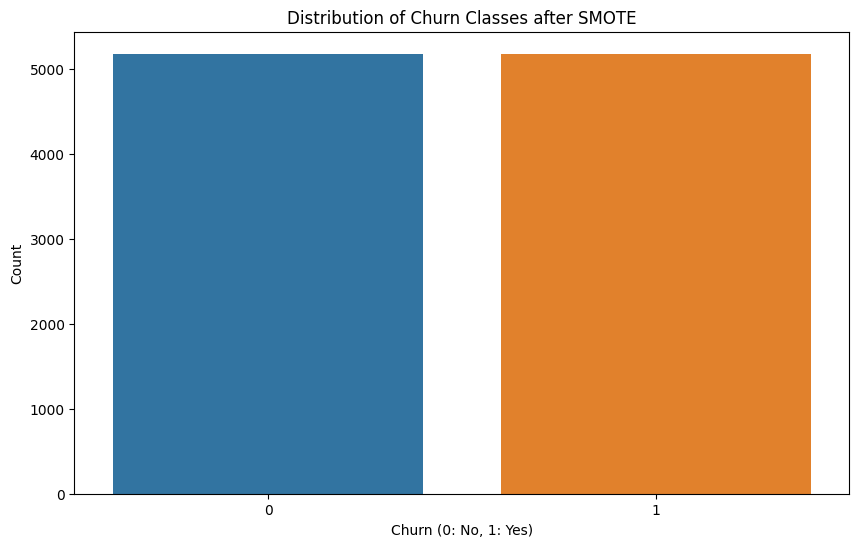

In [27]:
# Plot count of each class in the balanced 'Churn' column using seaborn
try:
    if 'loll' not in locals():
        print("Please run the SMOTE resampling cell first to create the 'loll' DataFrame")
    else:
        plt.figure(figsize=(10, 6))
        sns.countplot(data=loll, x='Churn', palette=['#1f77b4', '#ff7f0e'])
        plt.title('Distribution of Churn Classes after SMOTE')
        plt.xlabel('Churn (0: No, 1: Yes)')
        plt.ylabel('Count')
        plt.show()
except Exception as e:
    print(f"Error: {str(e)}\nPlease make sure to run the cells in the correct order:")

In [28]:
# Create models directory
os.makedirs('models', exist_ok=True)

# Define base models 
svm_poly = SVC(
    kernel='poly',
    degree=2,
    probability=True,
    random_state=42,
    max_iter=1000
)

ada_svm_poly = AdaBoostClassifier(
    estimator=svm_poly,
    n_estimators=25,
    random_state=42,
    learning_rate=1.0
)

rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    n_estimators=100,
    n_jobs=-1
)

# Base models
base_models = [
    ('ada_svm_poly', ada_svm_poly),
    ('rf', rf),
    ('xgb', xgb)
]


In [29]:
# Split for XGBoost validation
X_train_main, X_val, y_train_main, y_val = train_test_split(
    X_train_res, y_train_res, test_size=0.2, random_state=42
)
# For storing results
accuracies = []
names = []
# Create 5-Fold CV object
cv = KFold(n_splits=5, shuffle=True, random_state=42)
print("Training and saving individual models...\n")
for name, model in base_models:
    print("=======================================")
    print(f" Training {name}")
    print("=======================================")
    # 5-FOLD CROSS VALIDATION ADDED HERE
    try:
        cv_scores = cross_val_score(
            model, X_train_res, y_train_res,
            cv=cv, scoring='accuracy', n_jobs=-1
        )
        print(f"{name} 5-Fold CV Accuracy: {cv_scores.mean()*100:.2f}%")
    except:
        print(f"{name} CV Failed (skipped).")

    # Train model normally
    try:
        if name == 'xgb':
            model.fit(
                X_train_main, y_train_main,
                eval_set=[(X_val, y_val)],
                verbose=False
            )
        else:
            model.fit(X_train_res, y_train_res)

        y_pred = model.predict(x_test)
        acc = accuracy_score(y_test, y_pred)

        accuracies.append(acc * 100)
        names.append(name)

        print(f"{name} Test Accuracy: {acc*100:.2f}%")

        joblib.dump(model, f"models/{name}_model.pkl")
        print(f"Saved {name}_model.pkl\n")

    except Exception as e:
        print(f"Error training {name}: {str(e)}\n")


Training and saving individual models...

 Training ada_svm_poly
ada_svm_poly 5-Fold CV Accuracy: 60.29%
ada_svm_poly Test Accuracy: 56.64%
Saved ada_svm_poly_model.pkl

 Training rf
rf 5-Fold CV Accuracy: 81.09%
rf Test Accuracy: 99.57%
Saved rf_model.pkl

 Training xgb
xgb 5-Fold CV Accuracy: 81.97%
xgb Test Accuracy: 85.88%
Saved xgb_model.pkl



In [30]:
# STACKING
print("\n=======================================")
print(" Training Stacking Ensemble")
print("=======================================")

try:
    stack = StackingClassifier(
        estimators=base_models,
        final_estimator=RandomForestClassifier(n_estimators=200, random_state=42),
        cv=5,
        n_jobs=-1
    )

    # CV for stacking too
    cv_scores_stack = cross_val_score(
        stack, X_train_res, y_train_res,
        cv=cv, scoring='accuracy', n_jobs=-1
    )
    print(f"Stacking 5-Fold CV Accuracy: {cv_scores_stack.mean()*100:.2f}%")

    stack.fit(X_train_res, y_train_res)
    stack_pred = stack.predict(x_test)

    stack_acc = accuracy_score(y_test, stack_pred)

    accuracies.append(stack_acc * 100)
    names.append('stack')

    print(f"Stacking Test Accuracy: {stack_acc*100:.2f}%")

    joblib.dump(stack, "models/stacking_model.pkl")
    print("Saved stacking_model.pkl\n")

except Exception as e:
    print(f"Error training stacking: {str(e)}")


 Training Stacking Ensemble
Stacking 5-Fold CV Accuracy: 77.22%
Stacking Test Accuracy: 87.22%
Saved stacking_model.pkl



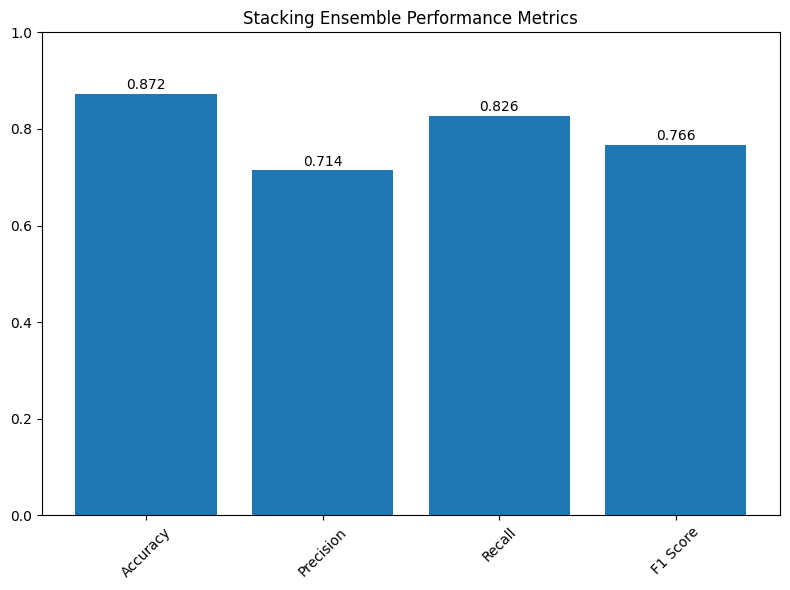


Classification Report for Stacking Ensemble:
              precision    recall  f1-score   support

    No Churn       0.94      0.89      0.91      1052
       Churn       0.71      0.83      0.77       357

    accuracy                           0.87      1409
   macro avg       0.83      0.86      0.84      1409
weighted avg       0.88      0.87      0.88      1409



In [31]:

def plot_stacking_metrics(y_true, y_pred):
    # Set style
    plt.style.use('default')
    
    # Create figure
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Calculate metrics
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))

    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) != 0 else 0
    recall = tp / (tp + fn) if (tp + fn) != 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
    
    # Plot metrics
    metrics = {
        'Accuracy': accuracy,
        'Precision': precision, 
        'Recall': recall,
        'F1 Score': f1
    }
    
    ax.bar(range(len(metrics)), list(metrics.values()))
    ax.set_xticks(range(len(metrics)))
    ax.set_xticklabels(metrics.keys(), rotation=45)
    ax.set_ylim(0, 1.0)
    ax.set_title('Stacking Ensemble Performance Metrics')
    
    # Add value labels
    for i, v in enumerate(metrics.values()):
        ax.text(i, v + 0.01, f'{v:.3f}', ha='center')
    
    plt.tight_layout()
    plt.show()
    
    # Print classification report
    print("\nClassification Report for Stacking Ensemble:")
    print(classification_report(y_true, y_pred, target_names=['No Churn', 'Churn']))

# Model Prediction Handling
try:
    stack_model = joblib.load('models/stacking_model.pkl')
    stack_pred = stack_model.predict(x_test)
    
    plot_stacking_metrics(y_test, stack_pred)

except FileNotFoundError:
    print("Stacking model file not found")
except Exception as e:
    print(f"Error processing stacking model: {str(e)}")
